# Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from datetime import timedelta

from sklearn.preprocessing import StandardScaler

import squarify

from sklearn.preprocessing import scale


from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

from sklearn.metrics import silhouette_score
from seaborn import color_palette

# The Data

https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

This data set contains all the transactions occurring for a UK-based and registered, online retail store between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. 

In [2]:
data1 = pd.read_excel('C:/Users/carls/OneDrive/Desktop/Projects\MiniProject_3/online_retail.xlsx', sheet_name = 'Year 2009-2010')

In [3]:
data1.shape

(525461, 8)

In [4]:
data1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
data2 = pd.read_excel('C:/Users/carls/OneDrive/Desktop/Projects\MiniProject_3/online_retail.xlsx', sheet_name = 'Year 2010-2011')

In [6]:
data2.shape

(541910, 8)

In [7]:
data2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
dataframes = [data1, data2]
data = pd.concat(dataframes)

In [9]:
data.shape

(1067371, 8)

In [10]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


.info observations:

    - 'Invoice' and 'StockCode' are of the object type as they are unique values that identify a sale or item - they are not numerical values that have a min/max/etc. so I will not be converting them to int or float types. 

# Cleaning the data

### Checking for duplicate values

In [12]:
data.duplicated().value_counts()

False    1033036
True       34335
dtype: int64

In [13]:
data.drop_duplicates(inplace = True)

In [14]:
data.shape

(1033036, 8)

### Checking for missing values

In [15]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64

As I am unable to segment customers that I cannot identify, I will be deleting all rows where there is no customer ID.

In [16]:
data.dropna(subset=['Customer ID'], inplace = True)

In [17]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

### Internal charges (to company)

In [18]:
print(data.StockCode)

0          85048
1         79323P
2         79323W
3          22041
4          21232
           ...  
541905     22899
541906     23254
541907     23255
541908     22138
541909      POST
Name: StockCode, Length: 797885, dtype: object


There are some 'stockcodes' that do not relate to customer purchases, but that relate to some admin costs for the organinisation. As these charges will impact my outcomes, I will delete these rows.

In [19]:
internalcosts = ['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT']

In [20]:
data = data[data['StockCode']!= 'POST']
data = data[data['StockCode']!= 'D']
data = data[data['StockCode']!= 'C2']
data = data[data['StockCode']!= 'M']
data = data[data['StockCode']!= 'BANK CHARGES']
data = data[data['StockCode']!= 'PADS']
data = data[data['StockCode']!= 'DOT']

In [21]:
print(data.StockCode)

0          85048
1         79323P
2         79323W
3          22041
4          21232
           ...  
541904     22613
541905     22899
541906     23254
541907     23255
541908     22138
Name: StockCode, Length: 794321, dtype: object


# EDA

### Customer 

In [22]:
data['Customer ID'].value_counts()

17841.0    12623
14911.0    11257
12748.0     6627
14606.0     6486
14096.0     5111
           ...  
16219.0        1
17291.0        1
13391.0        1
16220.0        1
15316.0        1
Name: Customer ID, Length: 5897, dtype: int64

##### Note
I have chosen value counts as a measure as the data set is broken down into rows by stockcode. The more times a customer number appears, the more stock items they have purchased/the more often they have visited the store.

In [23]:
data['Customer ID'].value_counts().nlargest(10)

17841.0    12623
14911.0    11257
12748.0     6627
14606.0     6486
14096.0     5111
15311.0     4576
14156.0     4072
14646.0     3853
13089.0     3391
16549.0     3098
Name: Customer ID, dtype: int64

Text(0, 0.5, 'Sales')

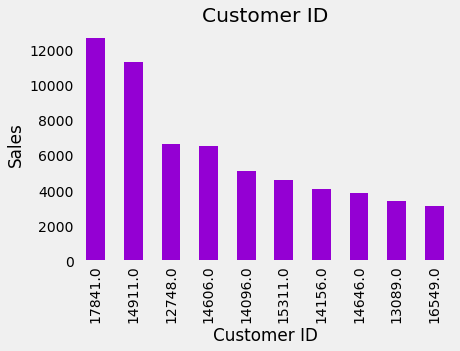

In [24]:
data['Customer ID'].value_counts().nlargest(10).plot (kind = 'bar', color = 'darkviolet', grid = False)
plt.title('Customer ID')
plt.xlabel('Customer ID')
plt.ylabel('Sales')

([<matplotlib.axis.YTick at 0x17f4bb00df0>,
 [Text(0, 0, ''), Text(0, 0, '')])

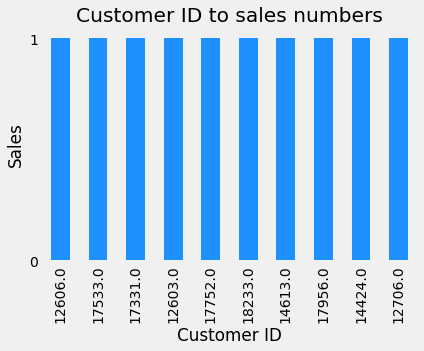

In [25]:
data['Customer ID'].value_counts().nsmallest(10).plot (kind = 'bar', color = 'dodgerblue', grid = False)
plt.title('Customer ID to sales numbers')
plt.xlabel('Customer ID')
plt.ylabel('Sales')
plt.yticks([0,1])

### Invoice

In [26]:
data['Invoice'].value_counts()

576339     541
579196     532
580727     528
578270     441
573576     434
          ... 
C542912      1
C540784      1
C514489      1
C571262      1
C558405      1
Name: Invoice, Length: 43975, dtype: int64

Text(0, 0.5, 'Invoice total value')

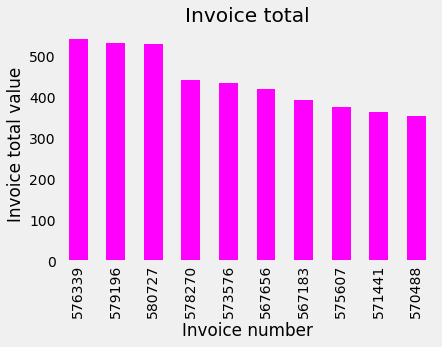

In [27]:
data['Invoice'].value_counts().nlargest(10).plot (kind = 'bar', color = 'fuchsia', grid = False)
plt.title('Invoice total')
plt.xlabel('Invoice number')
plt.ylabel('Invoice total value')

Text(0, 0.5, 'Invoice total value')

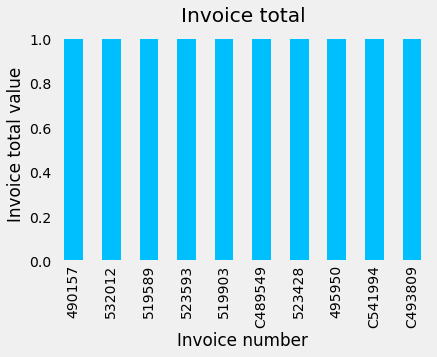

In [28]:
data['Invoice'].value_counts().nsmallest(10).plot (kind = 'bar', color = 'deepskyblue', grid = False)
plt.title('Invoice total')
plt.xlabel('Invoice number')
plt.ylabel('Invoice total value')

This plot above displays invoices that start with the letter 'C', research tells me that these are cancelled orders that I need to remove.

##### Checking for cancelled orders

As cancelled orders will negatively impact the number of sales for a customer, I will delete them.

In [29]:
data['Invoice'].str.startswith('C').value_counts()

True    17635
Name: Invoice, dtype: int64

In [30]:
data = data[~data['Invoice'].astype(str).str.startswith('C')]

##### Price checking to make sure there are no negative price values to address.

<AxesSubplot:>

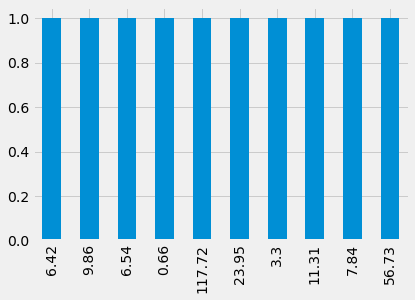

In [31]:
data['Price'].value_counts().nsmallest(10).plot(kind = 'bar')

In [32]:
data.shape

(776686, 8)

In [33]:
data['Invoice'].value_counts()

576339    541
579196    532
580727    528
578270    441
573576    434
         ... 
492752      1
555104      1
492822      1
555098      1
537194      1
Name: Invoice, Length: 36644, dtype: int64

### Stock Items

Text(0, 0.5, 'Number sold')

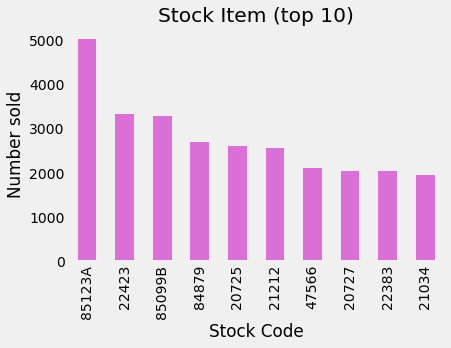

In [34]:
data['StockCode'].value_counts().nlargest(10).plot (kind = 'bar', color = 'orchid', grid = False)
plt.title('Stock Item (top 10)')
plt.xlabel('Stock Code')
plt.ylabel('Number sold')

([<matplotlib.axis.YTick at 0x17f54852cd0>,
 [Text(0, 0, ''), Text(0, 0, '')])

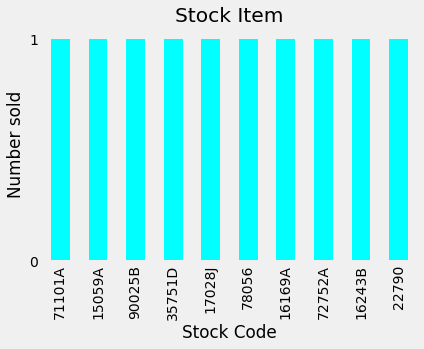

In [35]:
data['StockCode'].value_counts().nsmallest(10).plot (kind = 'bar', color = 'cyan', grid = False)
plt.title('Stock Item')
plt.xlabel('Stock Code')
plt.ylabel('Number sold')
plt.yticks([0,1])

### Countries

Text(0, 0.5, 'Number of sales')

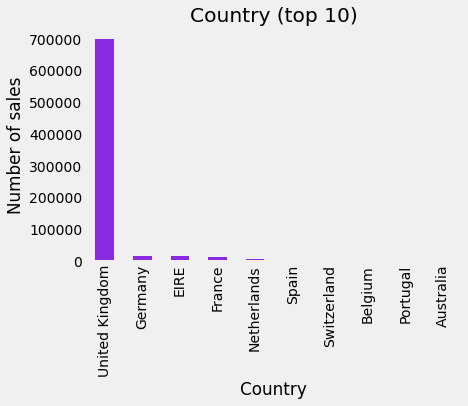

In [36]:
data['Country'].value_counts().nlargest(10).plot (kind = 'bar', color = 'blueviolet', grid = False)
plt.title('Country (top 10)')
plt.xlabel('Country')
plt.ylabel('Number of sales')

Text(0, 0.5, 'Number of sales')

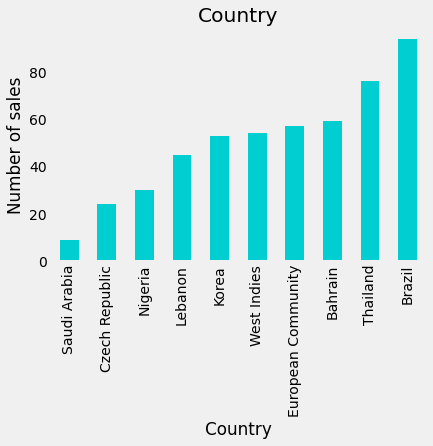

In [37]:
data['Country'].value_counts().nsmallest(10).plot (kind = 'bar', color = 'darkturquoise', grid = False)
plt.title('Country')
plt.xlabel('Country')
plt.ylabel('Number of sales')

# Feature engineering 

 - Adding a column that totals the amount ('revenue') made for an item (item quantity x price)

In [38]:
data['Revenue'] = data['Price'] * data['Quantity']

In [39]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [40]:
data.Revenue.describe()

count    776686.000000
mean         21.981957
std         225.919328
min           0.000000
25%           4.950000
50%          12.450000
75%          19.800000
max      168469.600000
Name: Revenue, dtype: float64

In [41]:
data.Revenue.max()

168469.6

In [42]:
data.Revenue.min()

0.0

The above figure (0.0) shows us that there are some transactions with a zero total which causes some confusion (how to you have a no value sale?). To remove this confusion I will delete these zero value 'sales'.

In [43]:
a = [0.0]
data = data[~data['Revenue'].isin(a)]

In [44]:
data.Revenue.min()

0.06

Text(0, 0.5, 'Number of sales (of stock item)')

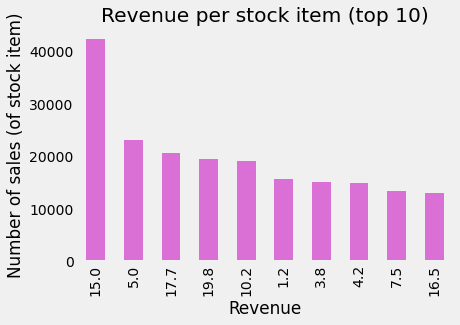

In [45]:
data['Revenue'].round(1).value_counts().nlargest(10).plot (kind = 'bar', color = 'orchid', grid = False)
plt.title('Revenue per stock item (top 10)')
plt.xlabel('Revenue')
plt.ylabel('Number of sales (of stock item)')

([<matplotlib.axis.YTick at 0x17f3dfe0940>,
 [Text(0, 0, ''), Text(0, 0, '')])

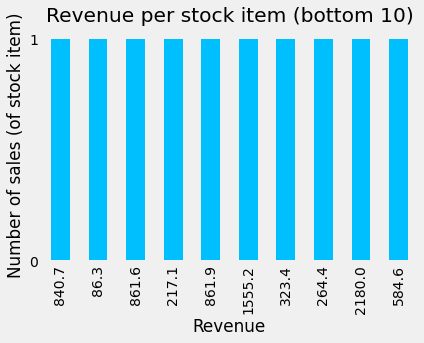

In [46]:
data['Revenue'].round(1).value_counts().nsmallest(10).plot (kind = 'bar', color = 'deepskyblue', grid= False)
plt.title('Revenue per stock item (bottom 10)')
plt.xlabel('Revenue')
plt.ylabel('Number of sales (of stock item)')
plt.yticks([0,1])

# Cohort Analysis

Dividing my customers into groups determined by the month of their first transaction.

In [47]:
def get_month(x): return dt.datetime(x.year, x.month, 1)
data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month)
grouping = data.groupby('Customer ID')['InvoiceMonth']
data['CohortMonth'] = grouping.transform('min') #min to assign smalled invoice month value to each customer (when was their first purchase?)

In [48]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,InvoiceMonth,CohortMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,2009-12-01


### Recenct purchases?
Calculating the number of months between the most recent purchase and the fist purchase (transactiom); using invoice month vs cohort month.

In [49]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [50]:
invoice_year, invoice_month, _ = get_date_int(data, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(data, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
data['CohortIndex'] = years_diff * 12 + months_diff + 1 #(1 so that first month is marked as 1 not zero to help with interpretation)
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,InvoiceMonth,CohortMonth,CohortIndex
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,2009-12-01,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,2009-12-01,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,2009-12-01,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01,2009-12-01,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,2009-12-01,1


## Calculating monthly active users

In [51]:
grouping = data.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Customer ID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Customer ID')

In [52]:
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2009-12-01,952.0,336.0,317.0,405.0,360.0,342.0,359.0,327.0,321.0,344.0,...,288.0,250.0,288.0,270.0,246.0,242.0,298.0,289.0,386.0,187.0
2010-01-01,382.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,106.0,121.0,...,57.0,90.0,75.0,71.0,75.0,93.0,74.0,94.0,21.0,NaN
2010-02-01,375.0,88.0,85.0,110.0,92.0,74.0,72.0,108.0,96.0,104.0,...,75.0,60.0,61.0,54.0,86.0,86.0,62.0,22.0,NaN,NaN
2010-03-01,439.0,84.0,102.0,106.0,102.0,90.0,108.0,134.0,122.0,48.0,...,75.0,77.0,69.0,78.0,89.0,94.0,34.0,NaN,NaN,NaN
2010-04-01,293.0,56.0,56.0,47.0,54.0,65.0,81.0,77.0,31.0,32.0,...,46.0,41.0,44.0,53.0,66.0,17.0,NaN,NaN,NaN,NaN
2010-05-01,254.0,40.0,43.0,44.0,45.0,65.0,54.0,32.0,15.0,21.0,...,32.0,35.0,42.0,39.0,12.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,267.0,47.0,50.0,55.0,62.0,76.0,34.0,24.0,22.0,30.0,...,33.0,35.0,54.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,185.0,29.0,34.0,55.0,54.0,26.0,21.0,27.0,27.0,21.0,...,32.0,44.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,162.0,32.0,47.0,53.0,27.0,19.0,16.0,21.0,22.0,21.0,...,32.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Interpretation
For Cohort 1, Month 2009-12 had 952 unique customers who made transactions that month, the following month (2010-01) had 382 members of cohort one make purchases, the third month (2010-02) had 375 returning customers, and so on.

# Retention rate

In [53]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(2) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2009-12-01,100.0,35.0,33.0,43.0,38.0,36.0,38.0,34.0,34.0,36.0,...,30.0,26.0,30.0,28.0,26.0,25.0,31.0,30.0,41.0,20.0
2010-01-01,100.0,21.0,31.0,31.0,26.0,30.0,26.0,23.0,28.0,32.0,...,15.0,24.0,20.0,19.0,20.0,24.0,19.0,25.0,5.0,NaN
2010-02-01,100.0,23.0,23.0,29.0,25.0,20.0,19.0,29.0,26.0,28.0,...,20.0,16.0,16.0,14.0,23.0,23.0,17.0,6.0,NaN,NaN
2010-03-01,100.0,19.0,23.0,24.0,23.0,21.0,25.0,31.0,28.0,11.0,...,17.0,18.0,16.0,18.0,20.0,21.0,8.0,NaN,NaN,NaN
2010-04-01,100.0,19.0,19.0,16.0,18.0,22.0,28.0,26.0,11.0,11.0,...,16.0,14.0,15.0,18.0,23.0,6.0,NaN,NaN,NaN,NaN
2010-05-01,100.0,16.0,17.0,17.0,18.0,26.0,21.0,13.0,6.0,8.0,...,13.0,14.0,17.0,15.0,5.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,100.0,18.0,19.0,21.0,23.0,28.0,13.0,9.0,8.0,11.0,...,12.0,13.0,20.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,100.0,16.0,18.0,30.0,29.0,14.0,11.0,15.0,15.0,11.0,...,17.0,24.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,100.0,20.0,29.0,33.0,17.0,12.0,10.0,13.0,14.0,13.0,...,20.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


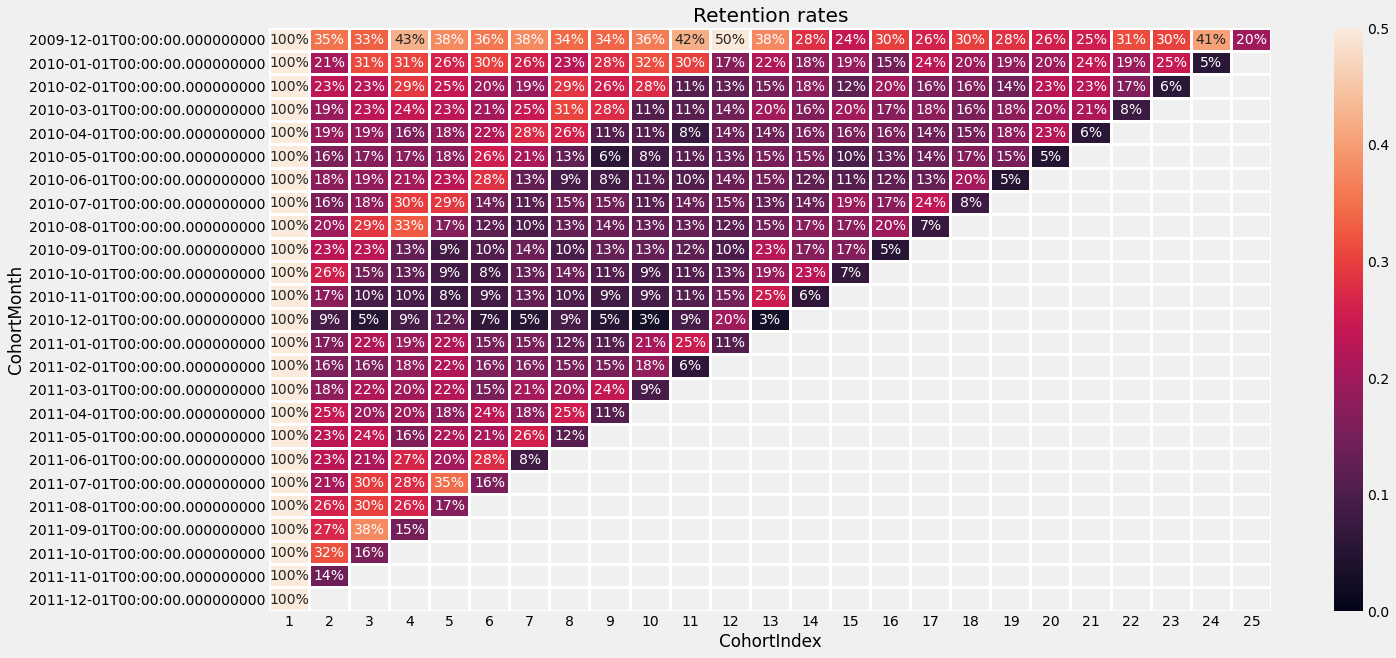

In [54]:
plt.figure(figsize=(20,10))
plt.title('Retention rates')
sns.heatmap(data = retention, linewidths=2,
annot = True,
fmt = '.0%',
vmin = 0.0,
vmax = 0.5)
plt.show()

##### Interpretation
- Because the cost of customer acquisition is very expensive, we need to do everything to convince the client to return after their first purchase.

- If your retention rate is low you will spend a higher amount of your budget acquiring new customers.

# RFM Segmentation

RFM stands for Recency, Frequency, and Monetary. RFM analysis is a commonly used technique to generate and assign a score to each customer based on how recent their last transaction was (Recency), how many transactions they have made in the last year (Frequency), and what the monetary value of their transaction was (Monetary).

https://towardsdatascience.com/customer-segmentation-in-online-retail-1fc707a6f9e6

# KMeans to determine customer segment

In [55]:
data.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

I have chosen to set the now/current time to the day after the last date of data available:
- If I were to choose an earlier date, I would cut off some of my data
- If I choose a later date (e.g. today) there will be years worth of data missing.

In [56]:
NOW = dt.datetime(2011,12,10)

In [57]:
data.shape

(776624, 12)

In [58]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,InvoiceMonth,CohortMonth,CohortIndex
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,2009-12-01,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,2009-12-01,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,2009-12-01,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01,2009-12-01,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,2009-12-01,1


In [59]:
RFMTable = data.groupby(['Customer ID']).agg({
        'InvoiceDate': lambda x: (NOW - x.max()).days,
        'Invoice': 'count',
        'Revenue': 'sum'})
# Rename the columns 
RFMTable.rename(columns={'InvoiceDate': 'Recency',
                         'Invoice': 'Frequency',
                         'Revenue': 'Monetary'}, inplace=True)

In [60]:
scaler = StandardScaler()
data = scaler.fit_transform(RFMTable)

C:\Users\carls\anaconda3\envs\Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\carls\anaconda3\envs\Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\carls\anaconda3\envs\Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

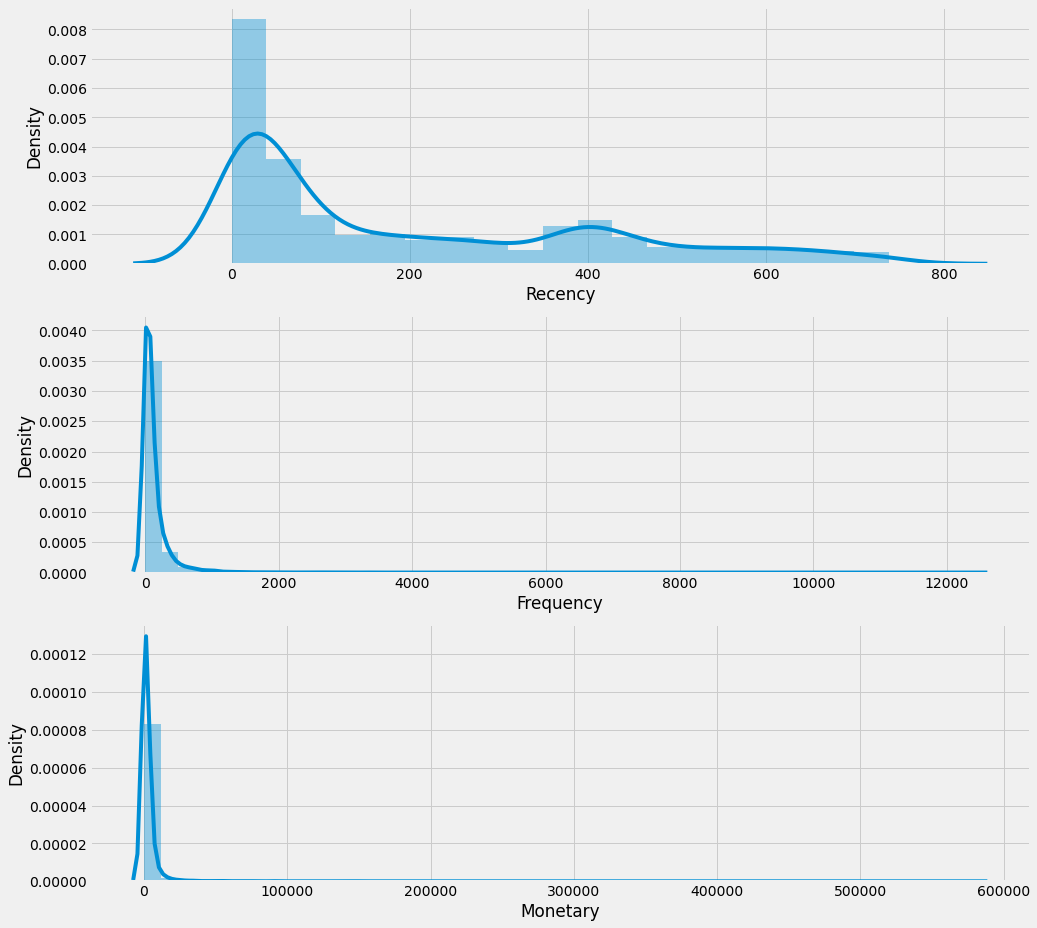

In [61]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(15,15))
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(RFMTable['Recency'])
# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(RFMTable['Frequency'])
# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(RFMTable['Monetary'])

In [62]:
RFMTable.describe()

,Recency,Frequency,Monetary
count,5861.000000,5861.000000,5861.000000
mean,200.472957,132.507081,2912.997490
std,209.217206,341.118970,14300.543046
min,0.000000,1.000000,2.950000
25%,25.000000,20.000000,338.130000
50%,95.000000,52.000000,854.990000
75%,379.000000,138.000000,2237.120000
max,738.000000,12425.000000,580987.040000


In [63]:
RFMTable.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Recency,0.892268,-0.464635
Frequency,18.073583,519.290468
Monetary,25.342535,850.129399


In [64]:
RFMTable.shape

(5861, 3)

## Sum of Squared Distances (Elbow Method)

In [65]:
# Kmeans with K=5
model5 = KMeans(n_clusters = 5, max_iter=50)
model5.fit(RFMTable)

KMeans(max_iter=50, n_clusters=5)

In [66]:
model5.labels_

array([3, 4, 4, ..., 4, 4, 4])

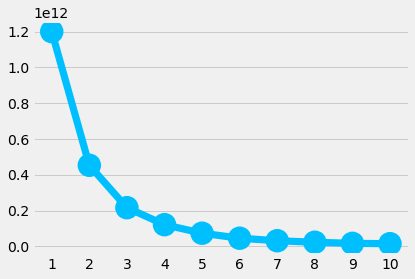

In [67]:
SSE = []
for k in range (0, 10):
    kmeans = KMeans(n_clusters=k+1, random_state = 50).fit(RFMTable)
    SSE.append(kmeans.inertia_)
    
sns.pointplot(x = list(range(1,11)), y=SSE, color='deepskyblue')
plt.show()

# Kmeans = 2 Clusters

In [68]:
# Final model with k=2
kmeans2 = KMeans(n_clusters=2, max_iter=50)
kmeans2.fit(RFMTable)

KMeans(max_iter=50, n_clusters=2)

In [69]:
 kmeans2.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
RFMTable['Cluster2_Id'] = kmeans2.labels_
RFMTable.head()

,Recency,Frequency,Monetary,Cluster2_Id
Customer ID,,,,
12346.0,325,34,77556.46,0
12347.0,2,222,4921.53,0
12348.0,75,46,1658.40,0
12349.0,18,172,3678.69,0
12350.0,310,16,294.40,0


Text(0.5, 1.0, '2 Clusters')

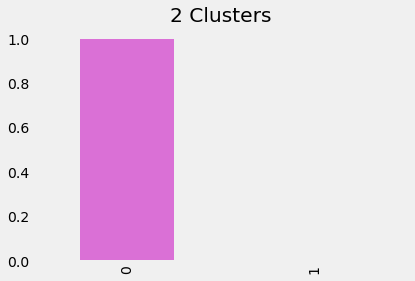

In [71]:
RFMTable['Cluster2_Id'].value_counts(normalize=True).plot(kind='bar', color = 'orchid', grid = False)
plt.title('2 Clusters')

<AxesSubplot:xlabel='Cluster2_Id', ylabel='Recency'>

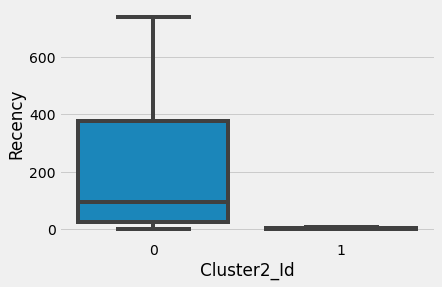

In [72]:
sns.boxplot(x='Cluster2_Id', y='Recency', data=RFMTable)

<AxesSubplot:xlabel='Cluster2_Id', ylabel='Frequency'>

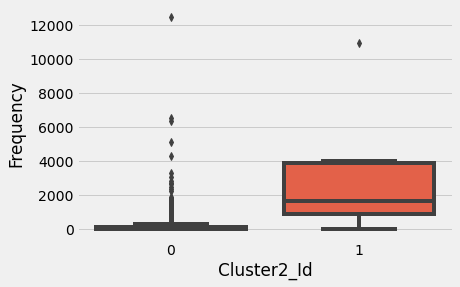

In [73]:
sns.boxplot(x='Cluster2_Id', y='Frequency', data=RFMTable)

<AxesSubplot:xlabel='Cluster2_Id', ylabel='Monetary'>

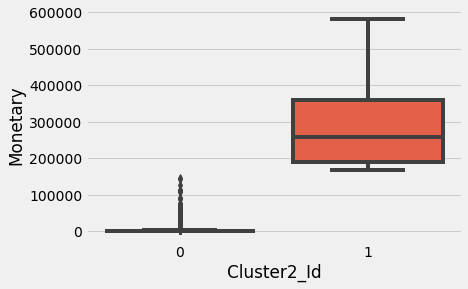

In [74]:
sns.boxplot(x='Cluster2_Id', y='Monetary', data=RFMTable)

In [75]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = RFMTable.groupby('Cluster2_Id').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

            Recency Frequency  Monetary      
               mean      mean      mean count
Cluster2_Id                                  
0             200.7     128.7    2495.8  5853
1               3.0    2947.6  308147.4     8


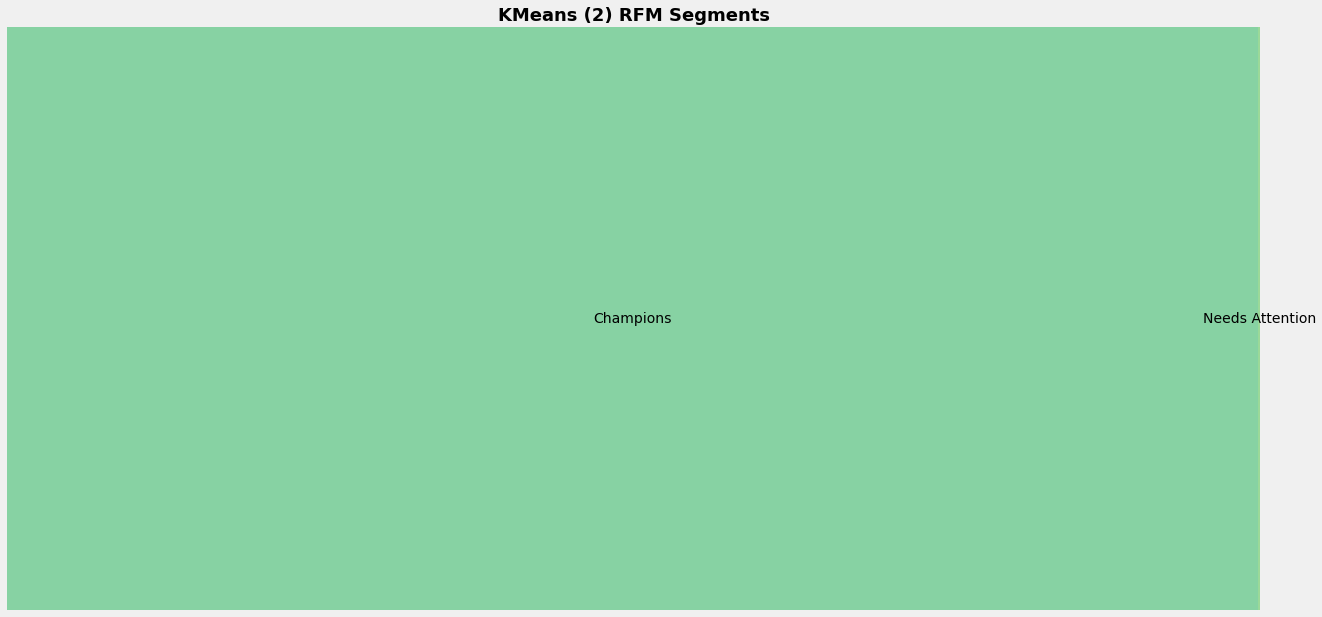

In [76]:
#cluster_agg.columns = cluster_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20,10)
squarify.plot(sizes=rfm_level_agg['count'], 
              label=['Champions',
                     'Needs Attention'], alpha=.6 )
plt.title("KMeans (2) RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

# Kmeans = 3 Clusters

In [77]:
# Final model with k=3
kmeans3 = KMeans(n_clusters=3, max_iter=50)
kmeans3.fit(RFMTable)

KMeans(max_iter=50, n_clusters=3)

In [78]:
 kmeans3.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
RFMTable['Cluster3_Id'] = kmeans3.labels_
RFMTable.head()

,Recency,Frequency,Monetary,Cluster2_Id,Cluster3_Id
Customer ID,,,,,
12346.0,325,34,77556.46,0,0
12347.0,2,222,4921.53,0,0
12348.0,75,46,1658.40,0,0
12349.0,18,172,3678.69,0,0
12350.0,310,16,294.40,0,0


Text(0.5, 1.0, '3 Clusters')

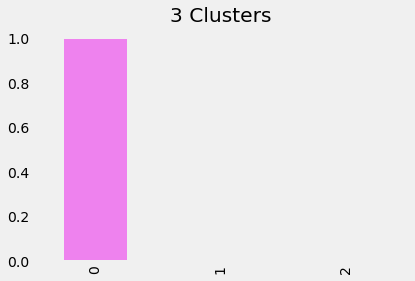

In [80]:
RFMTable['Cluster3_Id'].value_counts(normalize=True).plot(kind='bar', color = 'violet', grid = False)
plt.title('3 Clusters')

<AxesSubplot:xlabel='Cluster3_Id', ylabel='Recency'>

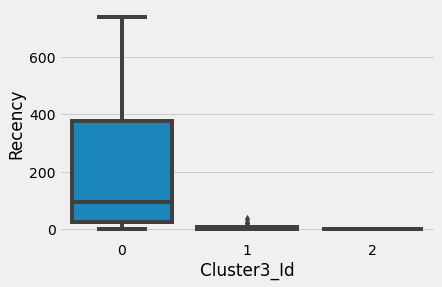

In [81]:
sns.boxplot(x='Cluster3_Id', y='Recency', data=RFMTable)

<AxesSubplot:xlabel='Cluster3_Id', ylabel='Frequency'>

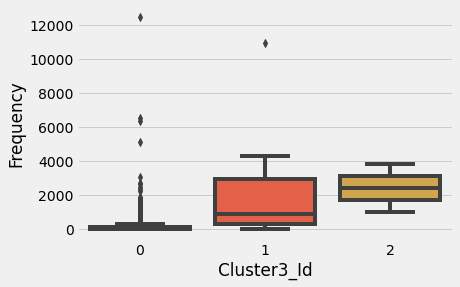

In [82]:
sns.boxplot(x='Cluster3_Id', y='Frequency', data=RFMTable)

<AxesSubplot:xlabel='Cluster3_Id', ylabel='Monetary'>

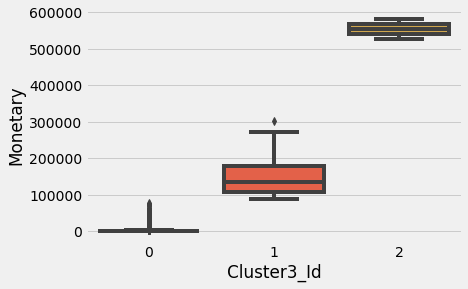

In [83]:
sns.boxplot(x='Cluster3_Id', y='Monetary', data=RFMTable)

In [84]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = RFMTable.groupby('Cluster3_Id').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

            Recency Frequency  Monetary      
               mean      mean      mean count
Cluster3_Id                                  
0             201.1     126.5    2305.8  5843
1               8.2    2044.0  155793.8    16
2               0.5    2429.5  553869.3     2


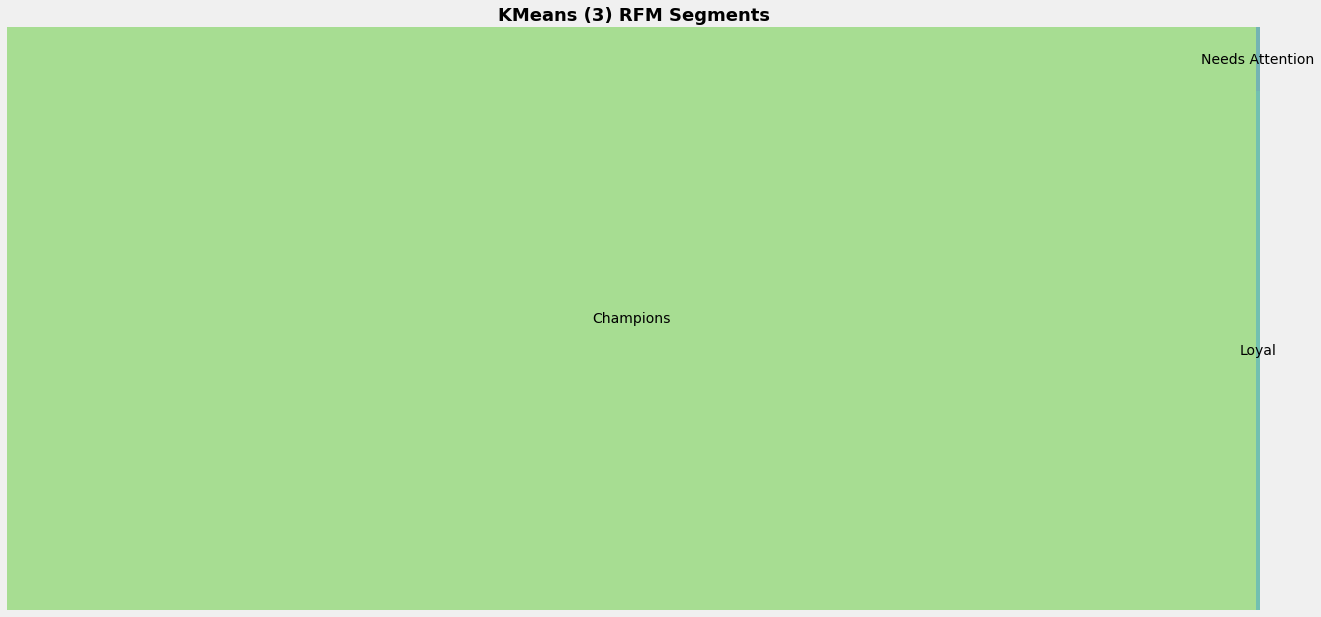

In [85]:
#cluster_agg.columns = cluster_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20,10)
squarify.plot(sizes=rfm_level_agg['count'], 
              label=['Champions',
                     'Loyal',
                     'Needs Attention'], alpha=.6 )
plt.title("KMeans (3) RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

# KMeans = 4 Clusters

In [86]:
# Final model with k=4
kmeans4 = KMeans(n_clusters=4, max_iter=50)
kmeans4.fit(RFMTable)

KMeans(max_iter=50, n_clusters=4)

In [87]:
 kmeans4.labels_

array([3, 0, 0, ..., 0, 0, 0])

In [88]:
RFMTable['Cluster4_Id'] = kmeans4.labels_
RFMTable.head()

,Recency,Frequency,Monetary,Cluster2_Id,Cluster3_Id,Cluster4_Id
Customer ID,,,,,,
12346.0,325,34,77556.46,0,0,3
12347.0,2,222,4921.53,0,0,0
12348.0,75,46,1658.40,0,0,0
12349.0,18,172,3678.69,0,0,0
12350.0,310,16,294.40,0,0,0


Text(0.5, 1.0, '4 Clusters')

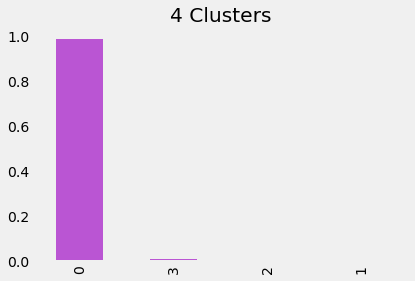

In [89]:
RFMTable['Cluster4_Id'].value_counts(normalize=True).plot(kind='bar', color = 'mediumorchid', grid=False)
plt.title('4 Clusters')

<AxesSubplot:xlabel='Cluster4_Id', ylabel='Recency'>

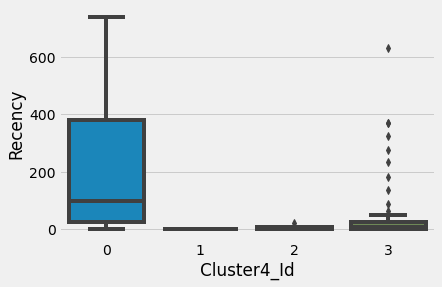

In [90]:
sns.boxplot(x='Cluster4_Id', y='Recency', data=RFMTable)

<AxesSubplot:xlabel='Cluster4_Id', ylabel='Frequency'>

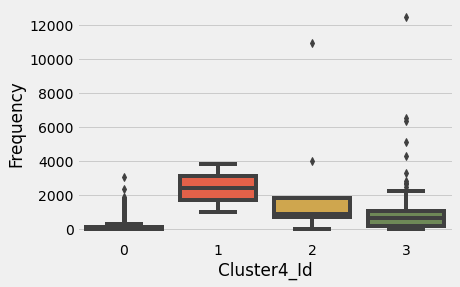

In [91]:
sns.boxplot(x='Cluster4_Id', y='Frequency', data=RFMTable)

<AxesSubplot:xlabel='Cluster4_Id', ylabel='Monetary'>

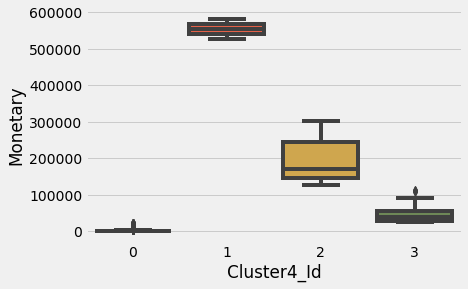

In [92]:
sns.boxplot(x='Cluster4_Id', y='Monetary', data=RFMTable)

In [93]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = RFMTable.groupby('Cluster4_Id').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

            Recency Frequency  Monetary      
               mean      mean      mean count
Cluster4_Id                                  
0             202.4     116.2    1939.8  5788
1               0.5    2429.5  553869.3     2
2               6.0    2362.1  197222.7     9
3              50.8    1259.2   47785.5    62


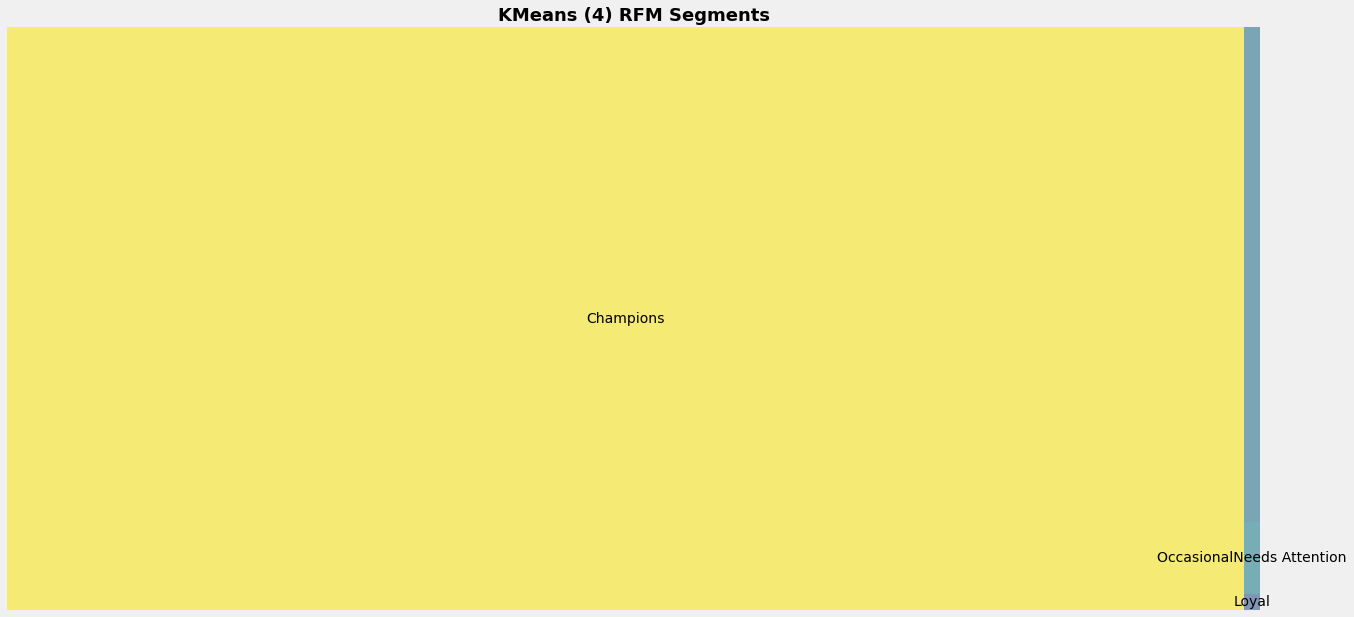

In [94]:
#cluster_agg.columns = cluster_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20,10)
squarify.plot(sizes=rfm_level_agg['count'], 
              label=['Champions',
                     'Loyal',
                     'Occasional'
                     'Needs Attention'], alpha=.6 )
plt.title("KMeans (4) RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

### Silhouette Analysis

As the above visualisations do not help us determine whether to use 3 or 4 clusters, I will use the Silhouette Analysis for further information.

Notes: 
- The range of the Silhouette value is between +1 and -1. A high value is desirable and indicates that the point is placed in the correct cluster. If many points have a negative Silhouette value, it may indicate that we have created too many or too few clusters.
- The Elbow Method is more of a decision rule, while the Silhouette is a metric used for validation while clustering. Thus, it can be used in combination with the Elbow Method.

In [95]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(RFMTable)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(RFMTable, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.986840672576518
For n_clusters=3, the silhouette score is 0.9765101987732974
For n_clusters=4, the silhouette score is 0.9440961666113635
For n_clusters=5, the silhouette score is 0.8347746186680794


From this silhouette analysis, we can see that 2 clusters best places customers in the correct group.

# Manual calculation to determine customer segment

In [96]:
RFMTable.head()

,Recency,Frequency,Monetary,Cluster2_Id,Cluster3_Id,Cluster4_Id
Customer ID,,,,,,
12346.0,325,34,77556.46,0,0,3
12347.0,2,222,4921.53,0,0,0
12348.0,75,46,1658.40,0,0,0
12349.0,18,172,3678.69,0,0,0
12350.0,310,16,294.40,0,0,0


In [97]:
RFMTable.drop(['Cluster2_Id'],axis = 1, inplace = True)
RFMTable.drop(['Cluster3_Id'],axis = 1, inplace = True)
RFMTable.drop(['Cluster4_Id'],axis = 1, inplace = True)

In [98]:
RFMTable.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,325,34,77556.46
12347.0,2,222,4921.53
12348.0,75,46,1658.40
12349.0,18,172,3678.69
12350.0,310,16,294.40


C:\Users\carls\anaconda3\envs\Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\carls\anaconda3\envs\Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\carls\anaconda3\envs\Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

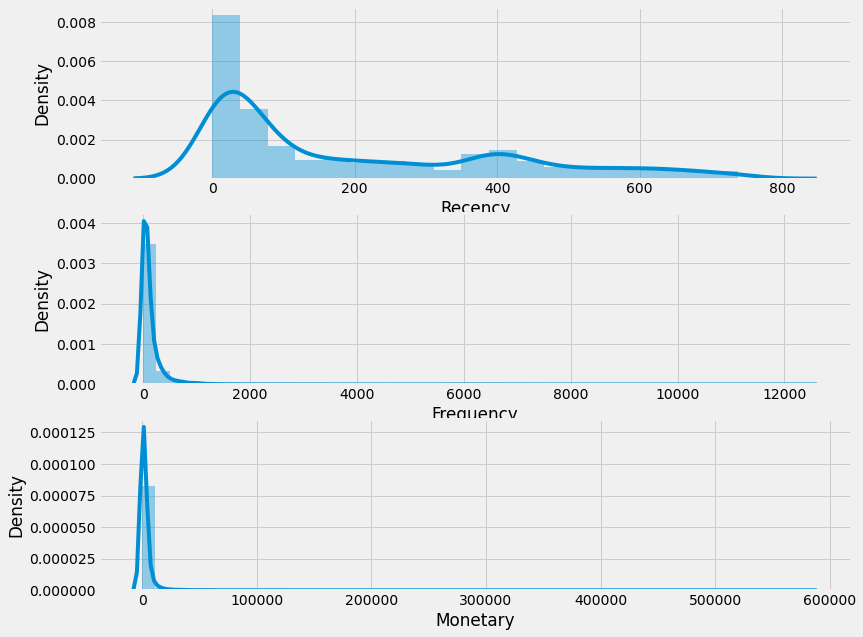

In [99]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(RFMTable['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(RFMTable['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(RFMTable['Monetary'])
# Show the plot
plt.show()

In [100]:
#Interpretation :
#Customers with ID 12346 have frequency : 1 (1 time transaction), recency : 325 (325 days of the last transaction), and monetary 77183.60 (Grand total transactions)  
#
#Customer with email 12347 has frequency : 182 (182 complete transaction times), recency : 2 (2 days from the last transaction), and monetary 4310.00 (Grand total transactions)

In [101]:
#quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
#quantiles = quantiles.to_dict()
#segmented_rfm = rfmTable

In [102]:
# --Calculate R and F groups--
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(RFMTable['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(RFMTable['Frequency'], q=4, labels=f_labels)
# Create new columns R and F 
RFMTable_Labels = RFMTable.assign(R = r_groups.values, F = f_groups.values)
RFMTable_Labels.head()

,Recency,Frequency,Monetary,R,F
Customer ID,,,,,
12346.0,325,34,77556.46,2,2
12347.0,2,222,4921.53,4,4
12348.0,75,46,1658.40,3,2
12349.0,18,172,3678.69,4,4
12350.0,310,16,294.40,2,1


In [103]:
# Create labels for Monetary
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(RFMTable['Monetary'], q=4, labels=m_labels)
# Create new column M
RFMTable_Labels = RFMTable_Labels.assign(M = m_groups.values)

In [104]:
RFMTable_Labels.head()

,Recency,Frequency,Monetary,R,F,M
Customer ID,,,,,,
12346.0,325,34,77556.46,2,2,4
12347.0,2,222,4921.53,4,4,4
12348.0,75,46,1658.40,3,2,3
12349.0,18,172,3678.69,4,4,4
12350.0,310,16,294.40,2,1,1


In [105]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
RFMTable_Labels['RFM_Segment'] = RFMTable_Labels.apply(join_rfm, axis=1)
RFMTable_Labels.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment
Customer ID,,,,,,,
12346.0,325,34,77556.46,2,2,4,2.02.04.0
12347.0,2,222,4921.53,4,4,4,4.04.04.0
12348.0,75,46,1658.40,3,2,3,3.02.03.0
12349.0,18,172,3678.69,4,4,4,4.04.04.0
12350.0,310,16,294.40,2,1,1,2.01.01.0


In [106]:
#RFM score: 444 is the best score because it has a low recency (still active), frequency high (often making transactions) and monetary high

In [107]:
# Count num of unique segments
rfm_count_unique = RFMTable_Labels.groupby('RFM_Segment')['RFM_Segment'].nunique()
print(rfm_count_unique.sum())

60


#### Concatenated segments
I now have 60 different segments that a customer could belong to, this is not practical and I need a more concise method to define my segments.

In [108]:
RFMTable_Labels['RFM_Score'] = RFMTable_Labels[['R','F','M']].sum(axis=1)
print(RFMTable_Labels['RFM_Score'].head())

Customer ID
12346.0     8
12347.0    12
12348.0     8
12349.0    12
12350.0     4
Name: RFM_Score, dtype: int64


In [109]:
RFMTable_Labels['RFM_Score'].value_counts()

5     630
7     626
8     623
12    618
6     609
10    562
4     560
9     556
3     541
11    536
Name: RFM_Score, dtype: int64

Text(0, 0.5, 'No. of customers')

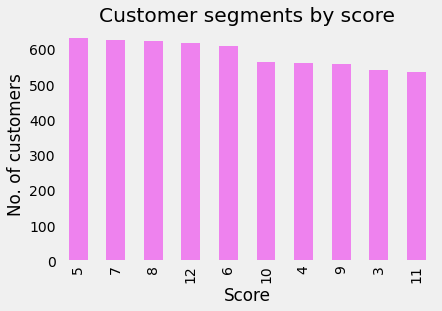

In [110]:
RFMTable_Labels['RFM_Score'].value_counts().plot(kind='bar', color = 'violet', grid = False)
plt.title('Customer segments by score')
plt.xlabel('Score')
plt.ylabel('No. of customers')

In [111]:
#We can get creative and hypothesize about what each score range entails, but for this exercise I will take inspiration from some common segment names.

In [112]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 11:
        return '5'
    elif ((df['RFM_Score'] >= 9) and (df['RFM_Score'] < 10)):
        return '4'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return '3'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return '2'
    else:
        return '1'
# Create a new variable RFM_Level
RFMTable_Labels['RFM_Level'] = RFMTable_Labels.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
RFMTable_Labels.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
Customer ID,,,,,,,,,
12346.0,325,34,77556.46,2,2,4,2.02.04.0,8,1
12347.0,2,222,4921.53,4,4,4,4.04.04.0,12,5
12348.0,75,46,1658.40,3,2,3,3.02.03.0,8,1
12349.0,18,172,3678.69,4,4,4,4.04.04.0,12,5
12350.0,310,16,294.40,2,1,1,2.01.01.0,4,1


Text(0, 0.5, 'No. of customers')

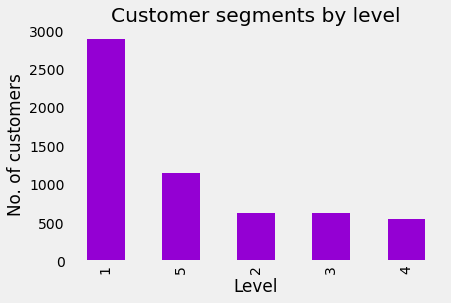

In [113]:
RFMTable_Labels['RFM_Level'].value_counts().plot(kind='bar', color = 'darkviolet', grid = False)
plt.title('Customer segments by level')
plt.xlabel('Level')
plt.ylabel('No. of customers')

In [114]:
RFMTable_Labels.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5861 entries, 12346.0 to 18287.0
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Recency      5861 non-null   int64   
 1   Frequency    5861 non-null   int64   
 2   Monetary     5861 non-null   float64 
 3   R            5861 non-null   category
 4   F            5861 non-null   category
 5   M            5861 non-null   category
 6   RFM_Segment  5861 non-null   object  
 7   RFM_Score    5861 non-null   int64   
 8   RFM_Level    5861 non-null   object  
dtypes: category(3), float64(1), int64(3), object(2)
memory usage: 498.1+ KB


<AxesSubplot:>

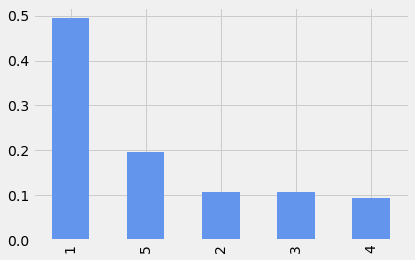

In [115]:
RFMTable_Labels['RFM_Level'].value_counts(normalize = True).plot(kind='bar', color = 'cornflowerblue')

In [116]:
RFMTable_Labels['RFM_Level'].value_counts(normalize = True)

1    0.493943
5    0.196895
2    0.107490
3    0.106808
4    0.094864
Name: RFM_Level, dtype: float64

In [117]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = RFMTable_Labels.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

          Recency Frequency Monetary      
             mean      mean     mean count
RFM_Level                                 
1           269.4      60.9   1137.8  2895
2           312.7      24.6    417.6   630
3           190.2      50.2   1061.5   626
4            96.5     108.9   2288.0   556
5            22.0     427.0  10034.1  1154


From here, we can see that a large percentage (~60%) of our customers are in the bottom tier RFM levels and will require some work to re-target them/re-engage them with the store.

The other 40% will need some work. Let’s explore using some initiatives to ensure that they remain loyal to the brand; freebies, VIP shoping events, etc.

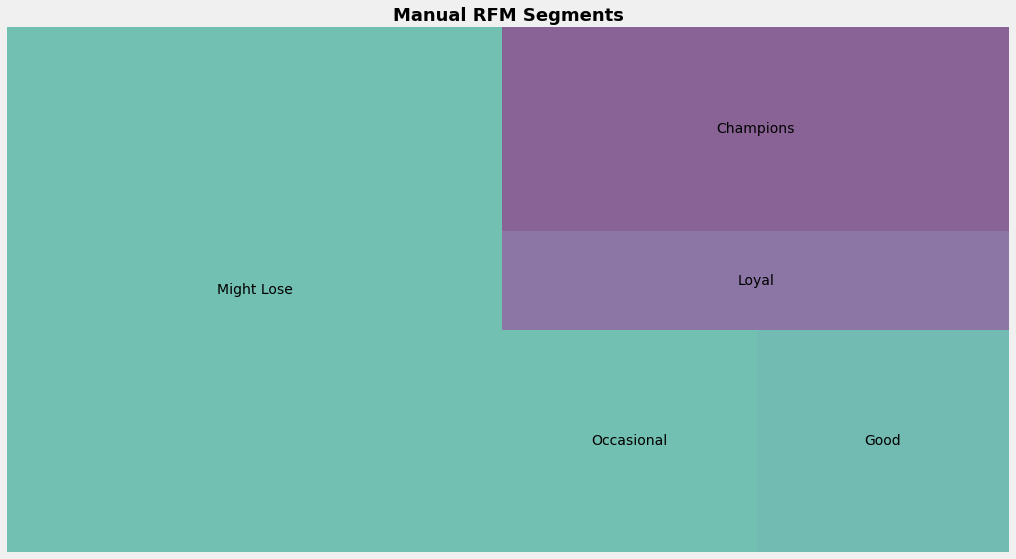

In [118]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['count'], 
              label=['Might Lose','Occasional' ,'Good' ,  'Loyal','Champions'], alpha=.6 )
plt.title("Manual RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

# Conclusion calculations

As it is more cost efficient to retain current customers than it is to generate new leads, the following calculations are to determine the potential profit for the organisation if those customers rated "good", "occasional" and "Might Lose" were to be converted to the median value (it seems unreasonable to assume they could be converted to the "loyal" and 'Champions" categories right away as it takes time to build the continued visits (recency and frequency elements)

In [119]:
RFMTable_Labels.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
Customer ID,,,,,,,,,
12346.0,325,34,77556.46,2,2,4,2.02.04.0,8,1
12347.0,2,222,4921.53,4,4,4,4.04.04.0,12,5
12348.0,75,46,1658.40,3,2,3,3.02.03.0,8,1
12349.0,18,172,3678.69,4,4,4,4.04.04.0,12,5
12350.0,310,16,294.40,2,1,1,2.01.01.0,4,1


In [120]:
RFMTable_Labels['Monetary'].nlargest(1710).mean()

8433.072619883042

In [121]:
RFMTable_Labels['Monetary'].nsmallest(3525).mean()

485.25160000000005

In [122]:
RFMTable_Labels['RFM_Level'].value_counts().median()

630.0

In [123]:
RFMTable_Labels['RFM_Level'].value_counts().mean()

1172.2

In [124]:
print('Average spend over two year period for RFM_Level 4 and 5 customers: ', RFMTable_Labels['Monetary'].nlargest(1710).mean())
print('Average spend over two year period for RFM_Level 1 and 2 customers: ', RFMTable_Labels['Monetary'].nsmallest(3525).mean())

Average spend over two year period for RFM_Level 4 and 5 customers:  8433.072619883042
Average spend over two year period for RFM_Level 1 and 2 customers:  485.25160000000005


In [126]:
print('approx. annual increase in revenue if levels 1 and 2 customers moved up to the monetary value of levels 4 and 5 customers: ',(RFMTable_Labels['Monetary'].nlargest(1710).mean() - RFMTable_Labels['Monetary'].nsmallest(3525).mean())*3525/2) #divided by two as values are for a two year period.

approx. annual increase in revenue if levels 1 and 2 customers moved up to the monetary value of levels 4 and 5 customers:  14008034.547543861


In [127]:
print('current/years 1 and 2 revenue = ', RFMTable_Labels['Monetary'].sum())

current/years 1 and 2 revenue =  17073078.29
